# Workshop 1 - Project 2
## Clara Duchoissis & Patrick Silva

In [1]:
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from shapely.geometry import Polygon
from shapely.geometry import Point
import os

In [2]:
df = pl.read_csv('dwca-birds_nk-v1.5/occurrence.txt', separator='\t')
df.describe()

statistic,id,institutionCode,basisOfRecord,occurrenceID,occurrenceRemarks,individualCount,eventDate,countryCode,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,vernacularName
str,str,str,str,str,str,f64,str,str,f64,f64,str,str,str,str,str,str,str,str,str
"""count""","""89632""","""89632""","""89632""","""89632""","""89632""",89552.0,"""89632""","""89632""",89632.0,89632.0,"""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632"""
"""null_count""","""0""","""0""","""0""","""0""","""0""",80.0,"""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,2.081472,null,null,-1.199514,37.039653,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,34.485674,null,null,1.415014,1.528497,null,null,null,null,null,null,null,null,null
"""min""","""00011221-51a1-4fe6-a6f7-16cf2e…","""Nature Kenya""","""HumanObservation""","""00011221-51a1-4fe6-a6f7-16cf2e…","""Critically Endangered (CR)""",1.0,"""2017-06-01""","""KE""",-4.719087,34.016667,"""Accipiter badius""","""Animalia""","""Chordata""","""AVES""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""Gallinago""","""Abbott's Booby"""
"""25%""",null,null,null,null,null,1.0,null,null,-1.67268,36.256333,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,1.0,null,null,-1.238391,36.8005,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,1.0,null,null,-0.332612,37.532486,null,null,null,null,null,null,null,null,null
"""max""","""ffffc424-17f5-467d-b736-928d37…","""Nature Kenya""","""HumanObservation""","""ffffc424-17f5-467d-b736-928d37…","""Vulnerable (VU)""",7000.0,"""2018-05-16""","""KE""",4.2018333,41.433333,"""agricola pallidus""","""Animalia""","""Chordata""","""Aves""","""passeriformes""","""Zosteropidae""","""pternistis""","""zonurus""","""black kite"""


In [3]:
df.head()

id,institutionCode,basisOfRecord,occurrenceID,occurrenceRemarks,individualCount,eventDate,countryCode,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,vernacularName
str,str,str,str,str,i64,str,str,f64,f64,str,str,str,str,str,str,str,str,str
"""579a9f82-3eab-45c2-875d-fcb634…","""Nature Kenya""","""HumanObservation""","""579a9f82-3eab-45c2-875d-fcb634…","""Least Concern (LC)""",1,"""2018-01-04""","""KE""",-2.223293,40.967442,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""190323ff-2e26-4964-961e-79ac0f…","""Nature Kenya""","""HumanObservation""","""190323ff-2e26-4964-961e-79ac0f…","""Least Concern (LC)""",1,"""2018-01-11""","""KE""",0.632465,36.035565,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""82c2acec-5ed5-4b92-be62-2b4352…","""Nature Kenya""","""HumanObservation""","""82c2acec-5ed5-4b92-be62-2b4352…","""Least Concern (LC)""",1,"""2018-01-12""","""KE""",1.010063,37.385208,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""e49afe06-1ab4-410e-8971-186b59…","""Nature Kenya""","""HumanObservation""","""e49afe06-1ab4-410e-8971-186b59…","""Least Concern (LC)""",1,"""2018-01-13""","""KE""",1.114823,37.460524,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""f34df1bf-97f4-47c8-baa8-58a2d4…","""Nature Kenya""","""HumanObservation""","""f34df1bf-97f4-47c8-baa8-58a2d4…","""Least Concern (LC)""",1,"""2018-01-30""","""KE""",1.014339,37.393476,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""


In [4]:
rows = len(df.select('id').rows())
print(f"The dataset has {rows} rows")

for column in df.columns:
    uc = len(df.select(column).unique().rows())
    print(f"The column '{column}' has a unique count of {uc}")

The dataset has 89632 rows
The column 'id' has a unique count of 89632
The column 'institutionCode' has a unique count of 1
The column 'basisOfRecord' has a unique count of 1
The column 'occurrenceID' has a unique count of 89632
The column 'occurrenceRemarks' has a unique count of 8
The column 'individualCount' has a unique count of 117
The column 'eventDate' has a unique count of 349
The column 'countryCode' has a unique count of 1
The column 'decimalLatitude' has a unique count of 54651
The column 'decimalLongitude' has a unique count of 54540
The column 'scientificName' has a unique count of 1267
The column 'kingdom' has a unique count of 1
The column 'phylum' has a unique count of 1
The column 'class' has a unique count of 2
The column 'order' has a unique count of 35
The column 'family' has a unique count of 113
The column 'genus' has a unique count of 443
The column 'specificEpithet' has a unique count of 938
The column 'vernacularName' has a unique count of 1429


In [5]:
institutionCode = df.item(0, "institutionCode")
basisOfRecord = df.item(0, "basisOfRecord")
countryCode = df.item(0, "countryCode")
kingdom = df.item(0, "kingdom")
phylum = df.item(0, "phylum")
    
df = df.drop(["institutionCode", "basisOfRecord", "countryCode", "kingdom", "phylum", "occurrenceID"])

In [6]:
df

id,occurrenceRemarks,individualCount,eventDate,decimalLatitude,decimalLongitude,scientificName,class,order,family,genus,specificEpithet,vernacularName
str,str,i64,str,f64,f64,str,str,str,str,str,str,str
"""579a9f82-3eab-45c2-875d-fcb634…","""Least Concern (LC)""",1,"""2018-01-04""",-2.223293,40.967442,"""Accipiter badius""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""190323ff-2e26-4964-961e-79ac0f…","""Least Concern (LC)""",1,"""2018-01-11""",0.632465,36.035565,"""Accipiter badius""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""82c2acec-5ed5-4b92-be62-2b4352…","""Least Concern (LC)""",1,"""2018-01-12""",1.010063,37.385208,"""Accipiter badius""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""e49afe06-1ab4-410e-8971-186b59…","""Least Concern (LC)""",1,"""2018-01-13""",1.114823,37.460524,"""Accipiter badius""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""f34df1bf-97f4-47c8-baa8-58a2d4…","""Least Concern (LC)""",1,"""2018-01-30""",1.014339,37.393476,"""Accipiter badius""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""215c7fe0-9e39-4497-86b5-87532c…","""Endangered (EN)""",1,"""2017-10-06""",-3.380438,38.353286,"""Zosterops silvanus""","""Aves""","""Passeriformes""","""Zosteropidae""","""Zosterops""","""silvanus""","""Taita White-eye"""
"""8a66d5b5-a2c3-4660-b72f-41d5e8…","""Endangered (EN)""",1,"""2017-10-14""",-3.4124,38.294419,"""Zosterops silvanus""","""Aves""","""Passeriformes""","""Zosteropidae""","""Zosterops""","""silvanus""","""Taita White-eye"""
"""37c29685-ec30-4154-a983-620e46…","""Endangered (EN)""",1,"""2017-10-17""",-3.483409,38.341279,"""Zosterops silvanus""","""Aves""","""Passeriformes""","""Zosteropidae""","""Zosterops""","""silvanus""","""Taita White-eye"""


In [9]:
# Directory containing county JSON files
county_dir = "/Users/claraduchossois/Documents/MADS/MADS Sem 3/Workshop 1/Projects/Workshop1-Project2/kenya-counties-subcounties/geojson"

# Initialize an empty list to store county polygons
county_polygons = []

# Loop through each JSON file in the directory
for filename in os.listdir(county_dir):
    if filename.endswith(".json"):
        # Extract county name from filename (assuming format: county_name.json)
        county_name = filename.replace(".json", "")
        
        # Load JSON file and extract coordinates
        with open(os.path.join(county_dir, filename)) as f:
            data = json.load(f)
            # Loop through each geometry
            for geometry in data['geometries']:
                coordinates = geometry['coordinates'][0][0]  # Assuming MultiPolygon coordinates structure

                # Create a polygon from the coordinates
                polygon = Polygon(coordinates)
                
                # Append to the list as a dictionary with county name and polygon
                county_polygons.append({'county': county_name, 'geometry': polygon})

# Convert list to a GeoDataFrame
county_gdf = gpd.GeoDataFrame(county_polygons, crs="EPSG:4326")  # Assuming coordinates are in WGS84 format

# Convert df to a GeoDataFrame with Point geometry
gdf_observations = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['decimalLongitude'], df['decimalLatitude']),
    crs="EPSG:4326"
)

# Spatial join to add county information to each observation
observations_with_county = gpd.sjoin(gdf_observations, county_gdf, how="left", predicate="within")

# Check the result
print(observations_with_county.head())


                                      0                   1    2           3  \
0  579a9f82-3eab-45c2-875d-fcb634b84c9a  Least Concern (LC)  1.0  2018-01-04   
1  190323ff-2e26-4964-961e-79ac0fe2a73e  Least Concern (LC)  1.0  2018-01-11   
2  82c2acec-5ed5-4b92-be62-2b43522a6f46  Least Concern (LC)  1.0  2018-01-12   
3  e49afe06-1ab4-410e-8971-186b5967b86b  Least Concern (LC)  1.0  2018-01-13   
4  f34df1bf-97f4-47c8-baa8-58a2d40e3b52  Least Concern (LC)  1.0  2018-01-30   

          4          5                 6     7                8             9  \
0 -2.223293  40.967442  Accipiter badius  Aves  Accipitriformes  Accipitridae   
1  0.632465  36.035565  Accipiter badius  Aves  Accipitriformes  Accipitridae   
2  1.010063  37.385208  Accipiter badius  Aves  Accipitriformes  Accipitridae   
3  1.114823  37.460524  Accipiter badius  Aves  Accipitriformes  Accipitridae   
4  1.014339  37.393476  Accipiter badius  Aves  Accipitriformes  Accipitridae   

          10      11      12    

In [15]:
# Group by county and calculate the number of unique orders
richness_per_county = observations_with_county.groupby('county')[6].nunique().reset_index()
richness_per_county.columns = ['county', 'order_richness']

# Join this back with county_gdf to plot richness on the map
county_richness_gdf = county_gdf.merge(richness_per_county, on='county', how='left').fillna(0)

# Check the result
print(county_richness_gdf.head())


        county                                           geometry  \
0        busia  POLYGON ((33.95197 -0.03283, 34.00794 -0.02864...   
1  uasin-gishu  POLYGON ((34.85349 0.54655, 34.86811 0.54629, ...   
2     machakos  POLYGON ((36.89069 -1.41375, 36.90949 -1.42286...   
3        bomet  POLYGON ((35.01399 -0.89025, 35.02332 -0.89277...   
4      nairobi  POLYGON ((36.66313 -1.30575, 36.65372 -1.31614...   

   order_richness  
0           115.0  
1           192.0  
2           304.0  
3             2.0  
4           552.0  


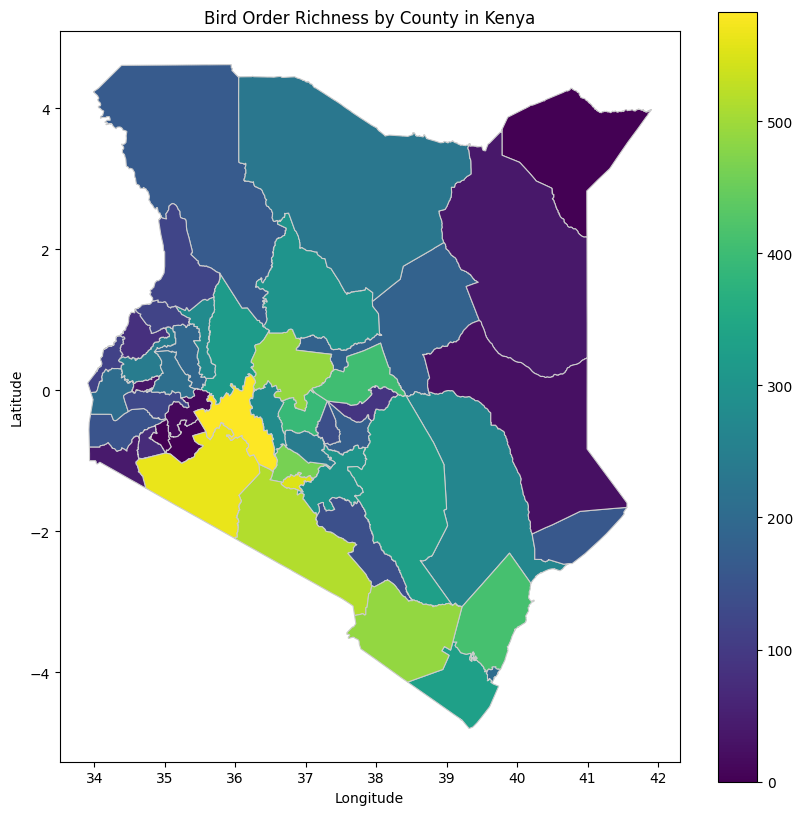

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
county_richness_gdf.plot(column='order_richness', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Bird Order Richness by County in Kenya')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

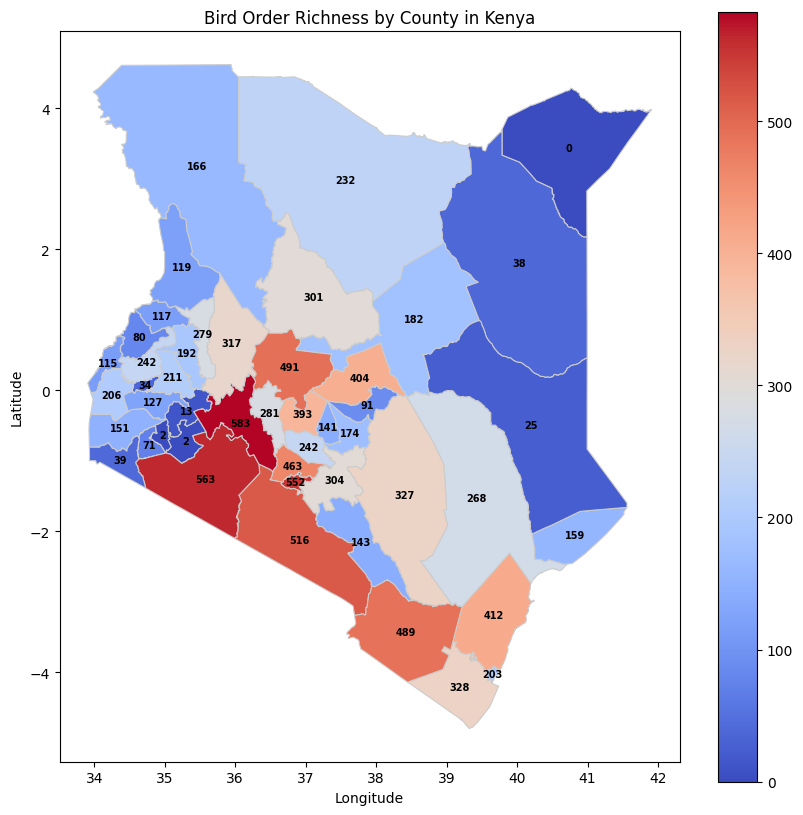

In [ ]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
county_richness_gdf.plot(column='order_richness', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set titles and labels
ax.set_title('Bird Order Richness by County in Kenya')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add counts to the map
for idx, row in county_richness_gdf.iterrows():
    # Calculate the centroid of each county polygon
    centroid = row['geometry'].centroid
    # Place the text with the count at the centroid location
    ax.text(centroid.x, centroid.y, int(row['order_richness']), 
            ha='center', va='center', fontsize=7, fontweight = 'bold', color='black')

plt.show()
